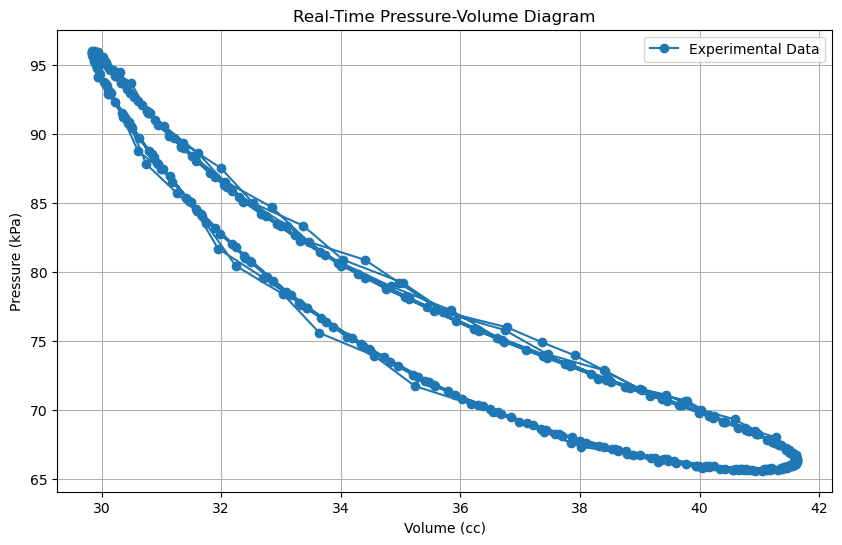

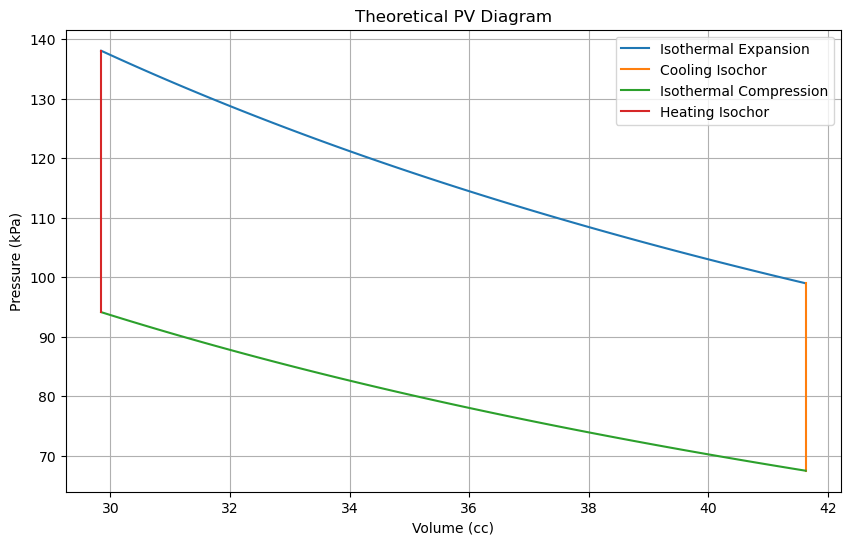

Number of moles: 0.00103
Work during isothermal expansion: 1.37 Joules
Work during isothermal compression: 0.93 Joules
Thermal energy absorbed during expansion: 1.37 Joules
Thermal energy released during compression: 0.93 Joules
Thermal energy during cooling: 3.28 Joules
Thermal energy during heating: 3.28 Joules


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import datetime

# Load your experimental data
data_path = 'Stirling_Engine_Data.csv'
data = pd.read_csv(data_path)

# Constants
R = 8.3144598  # molar gas constant in joules / (mole kelvin)
p3 = 67.5  # kilopascals - pressure when cold, fully expanded
etareg = 0.318  # regenerator efficiency as a fraction
cv = 5 * R / 2  # molar heat capacity at constant volume

# Calculate Vmincc and Vmaxcc from the volume data (- Driven includes data taken from engine running under CV motor)
Vmincc = data['Volume'].min()
#Vmincc = data['Volume - Driven'].min()
Vmaxcc = data['Volume'].max()
#Vmaxcc = data['Volume - Driven'].max()

# Calculate Tcold and Thot from temperature data
Thot = data['Temperature 1'].max() + 273.15   # converting to Kelvin
#Thot = data['Temperature 1 - Driven'].max() + 273.15
Tcold = data['Temperature 2'].min() + 273.15  # converting to Kelvin
#Tcold = data['Temperature 2 - Driven'].min() + 273.15

# Calculate number of moles at the cold point
nmoles = p3 * 1000 * Vmaxcc * 1E-6 / (R * Tcold)

# Plot real-time Pressure-Volume (PV) diagram from experimental data
plt.figure(figsize=(10, 6))
plt.plot(data['Volume'], data['Pressure'], marker='o', label='Experimental Data')
plt.title('Real-Time Pressure-Volume Diagram')
plt.xlabel('Volume (cc)')
plt.ylabel('Pressure (kPa)')
plt.grid(True)
plt.legend()
plt.show()

# Assuming these points exist and are accurate
p4 = p3 * Vmaxcc / Vmincc
p1 = p4 * Thot / Tcold 

# Create arrays for PV diagram
v41 = np.full(100, Vmincc)
p41 = np.linspace(p4, p1, 100)
v12 = np.linspace(Vmincc, Vmaxcc, 100)
p12 = p1 * Vmincc / v12
p2 = p3 * Thot / Tcold
p23 = np.linspace(p2, p3, 100)
v23 = np.full(100, Vmaxcc)
v34 = v12
p34 = p4 * Vmincc / v34

# Plot theoretical PV diagram based on state transitions
plt.figure(figsize=(10, 6))
plt.plot(v12, p12, label='Isothermal Expansion')
plt.plot(v23, p23, label='Cooling Isochor')
plt.plot(v34, p34, label='Isothermal Compression')
plt.plot(v41, p41, label='Heating Isochor')
plt.title('Theoretical PV Diagram')
plt.xlabel('Volume (cc)')
plt.ylabel('Pressure (kPa)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate work and thermal energies
W12 = nmoles * R * Thot * np.log(Vmaxcc / Vmincc)
Q12 = W12  # thermal energy absorbed by gas in isothermal expansion
Q23 = cv * nmoles * (Thot - Tcold)
W34 = nmoles * R * Tcold * np.log(Vmaxcc / Vmincc)
Q34 = W34  # thermal energy released by gas in isothermal compression
Q41 = cv * nmoles * (Thot - Tcold)

# Output results
print('Number of moles: {:.5f}'.format(nmoles))
print('Work during isothermal expansion: {:.2f} Joules'.format(W12))
print('Work during isothermal compression: {:.2f} Joules'.format(W34))
print('Thermal energy absorbed during expansion: {:.2f} Joules'.format(Q12))
print('Thermal energy released during compression: {:.2f} Joules'.format(Q34))
print('Thermal energy during cooling: {:.2f} Joules'.format(Q23))
print('Thermal energy during heating: {:.2f} Joules'.format(Q41))